In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import dedalus.public as d3 #wow, I just had to call it dedalus.public
# Had been writing dedalus3 and assuming there were actual errors with jupyter notebook launch
# since it always makes so many complaints
# Well now I'm just going to ignore the remaining jupyter notebook weirdness

In [28]:
df = h5py.File("DataFolders/128RunTry/checkpoints2/checkpoints2_s2.h5",'r')

In [23]:
df_fields = h5py.File("DataFolders/128RunTry/fields_two/fields_two_s1.h5",'r')

In [29]:
lnrho = df['tasks/lnrho'][:]

In [25]:
rho_fields = df_fields['tasks/rho'][:]

In [30]:
df['tasks'].keys()

<KeysViewHDF5 ['A', 'T', 'lnrho', 'phi', 'tau_A', 'v']>

In [31]:
rho = np.exp(lnrho)

In [33]:
lnrho.min()

nan

In [84]:
lnrho.max()

nan

In [29]:
rho_fields.min()

0.005302375576259122

In [34]:
df['scales/sim_time'][:]

array([0.10005199, 0.10136255, 0.10534314, 0.10932373, 0.11330432,
       0.11728491, 0.1212655 , 0.12524608, 0.12906059, 0.13283357,
       0.13660655, 0.14037953, 0.14415251, 0.14792549, 0.15169847,
       0.15547145, 0.15924443, 0.16301741, 0.16679039, 0.17056338])

In [35]:
df['scales/iteration'][:]

array([264, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450])

In [32]:
df_fields['scales/iteration'][:]

array([  0, 251])

In [154]:
#with "h5py.file()" as file:
#    file.(whatever)
#    data = file['tasks/...'']
# last line in with grouping closes file

In [4]:
# Some toying around to figure out what x and xVal are, and r

r = 1
length = 10
nx = 32 #formerly 32 x 32 x 160? Current plan is 64 x 64 x 320 or 640
ny = 32
nz = 160
mesh = None
coords = d3.CartesianCoordinates('x', 'y','z')
dist = d3.Distributor(coords, dtype=np.float64, mesh = mesh)
xbasis = d3.RealFourier(coords['x'], size=nx, bounds=(-r, r))
ybasis = d3.RealFourier(coords['y'], size=ny, bounds=(-r, r))
zbasis = d3.RealFourier(coords['z'], size=nz, bounds=(0, length))
x,y,z = dist.local_grids(xbasis,ybasis,zbasis)

p = 0
radmax = 0
# print(x) # prints triple array with single list singleton lists of -1 to  0.9375, 32 elts
# print(z) # similar, 160 elts, from 0 to 9.9375
# print(xbasis)
# print([[i,0,0] for i in range(x.shape[0])]) # prints list of [0,0,0] thru to [31,0,0]
#print(x.shape[0], x.shape[1], x.shape[2]) #prints 32, 1, 1
# print(z.shape[0], z.shape[1], z.shape[2]) #prints 1, 1, 160
# print(x[-1,0,0])
# print(type(x)) # class 'numpy.ndarray' (3D)
# print(x)
# print(type([1,0,0])) # class list (duh)
# print(x[1,0,0]) #prints -0.9375 - must be 
#y = np.ndarray
#y = [[[0]],[[1]],[[2]]] # not how instantiating a numpy array works
# print(y)
#y = x
#print(x)
# print("y mult is", y[1,0,0])
# print("x mult is", x[1,0,0])
#print(x)
#print(y)
#print(z)
for i in range(x.shape[0]):
    xVal = x[i,0,0]
    print("x is", x)
    print("xval is", xVal) # oh so this val thing just takes the specific value
    # (i.e. the ith entry and only the first component) from the 3D numpy array, but the set of
    # values are the same between x and xval
    for j in range(y.shape[1]):
        yVal = y[0,j,0]
        # print("yVal is", yVal)
        for k in range(z.shape[2]):
            zVal = z[0,0,k]
            rad = np.sqrt(xVal**2 + yVal**2)
            p += 1
            if p % 1000 == 0:
                # print("xVal is", xVal)
                # print("x is", x)
                # print("[i,0,0] is", [i,0,0])
                # print("yVal is", yVal)
                # print("zVal is", zVal) # single number from 0 to 10
                # print("z is", z) # full 160 list
                #print("rad is", rad)
                print("radmax is", radmax)
            radmax = max(rad, radmax)

x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.6875]]

 [[ 0.75  ]]

 [[ 0.8125]]

 [[ 0.875 ]]

 [[ 0.9375]]]
xval is -1.0
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.

x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.6875]]

 [[ 0.75  ]]

 [[ 0.8125]]

 [[ 0.875 ]]

 [[ 0.9375]]]
xval is 0.3749999999999998
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
radmax is 1.4142135623730951
x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.

In [167]:
Density = df['tasks/lnrho'][11,:,:,:]

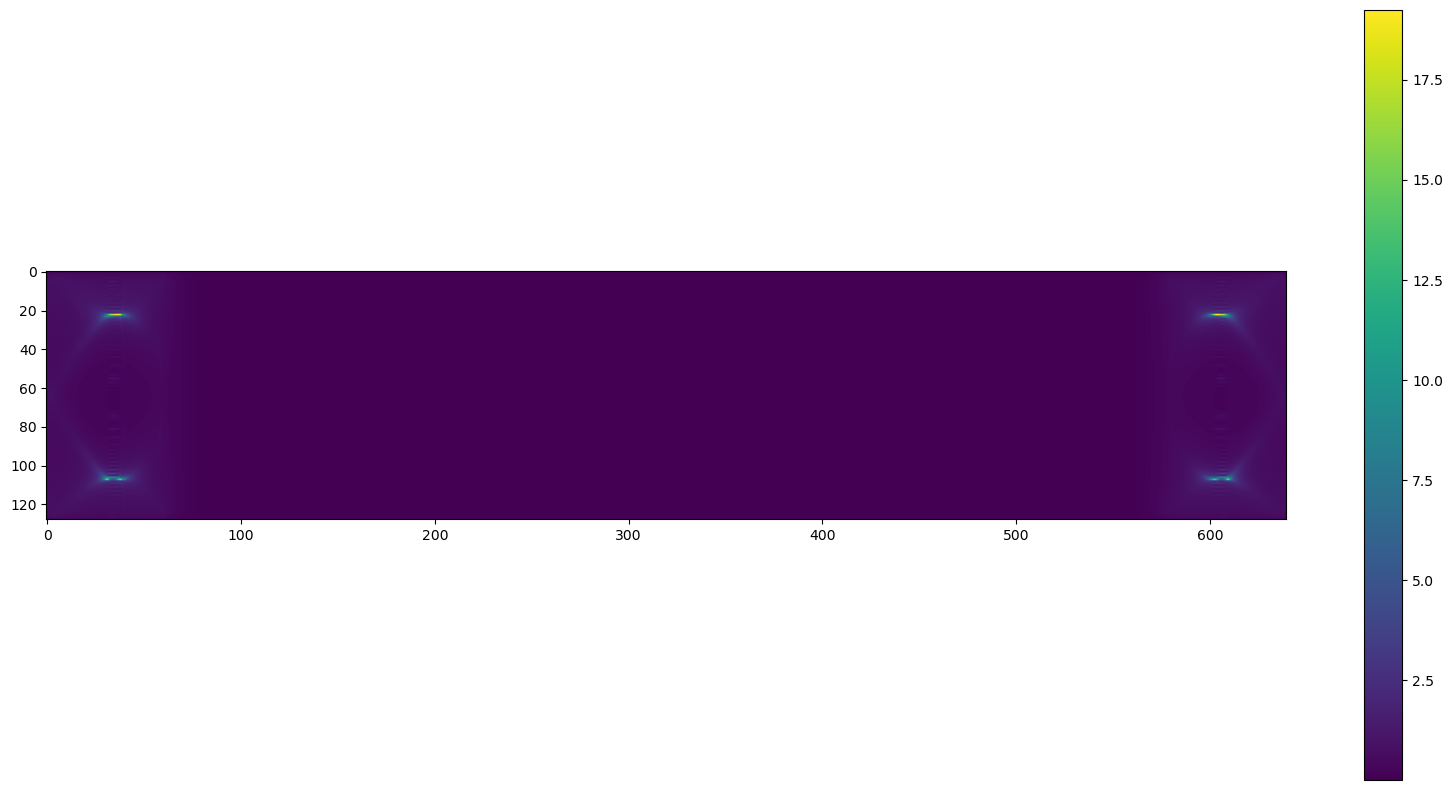

In [168]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(np.exp(Density[:,63,:])) #vmax = 0.01
plt.colorbar()

In [163]:
Temp = df['tasks/T'][12,:,:,:]

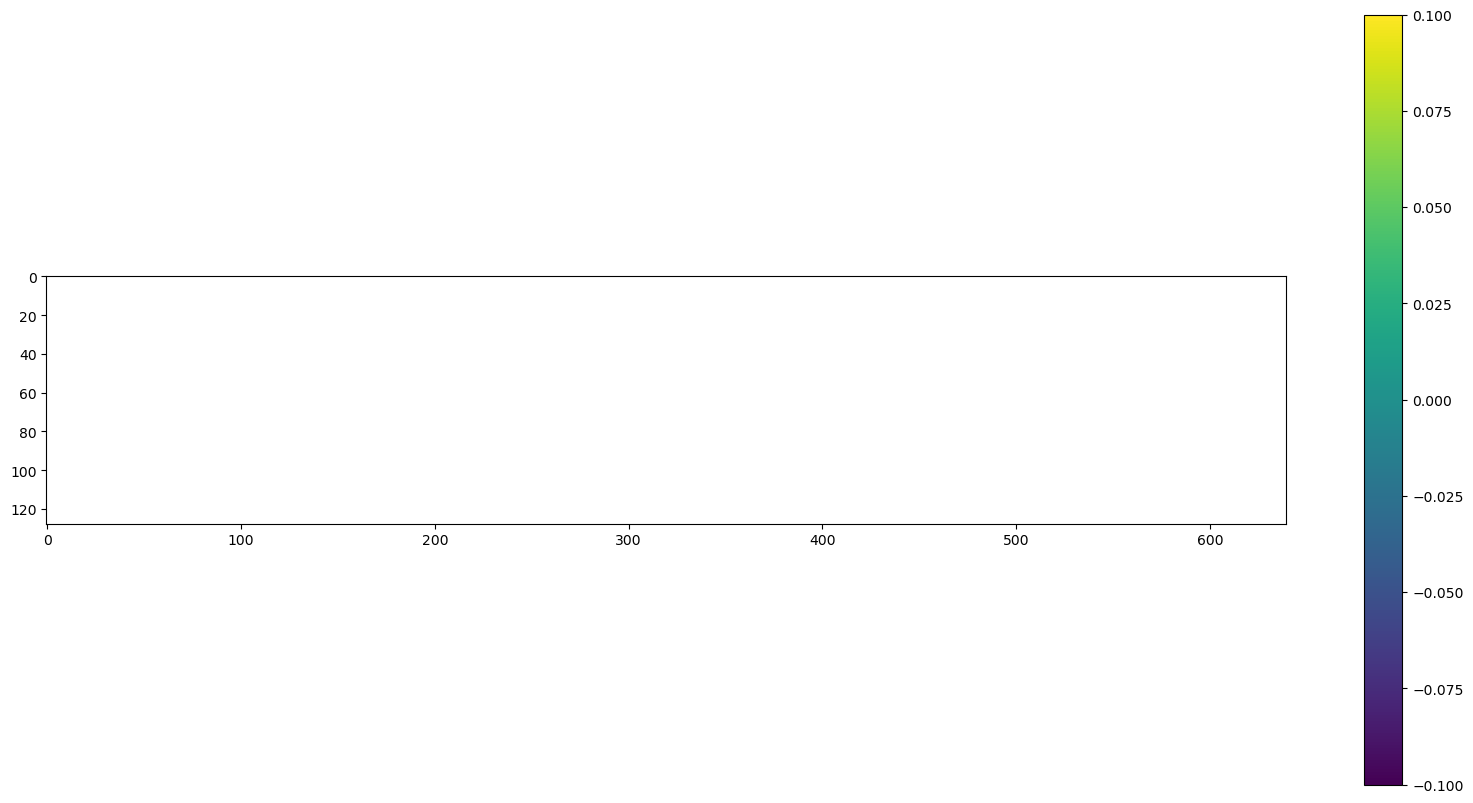

In [164]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(Temp[:,63,:]) #vmax = 0.01
plt.colorbar()

### np.exp(Density).min()

In [134]:
np.exp(Density).argmin() #turn this into 3D index - unravel, then slice in one of those directions to see plane where min is

33280

In [52]:
T_fields = df_fields['tasks/T'][:]
T_fields.min()

0.004398964351309154

In [53]:
Temp.min()

0.004398964351309154

In [137]:
rho_fields.min()

-0.7194252063844384

In [7]:
df.close()
# df_fields.close()